In [12]:
%load_ext autoreload  
%autoreload 2  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Axes: ylabel='O−C'>, <Axes: xlabel='Cycle', ylabel='Resid'>)

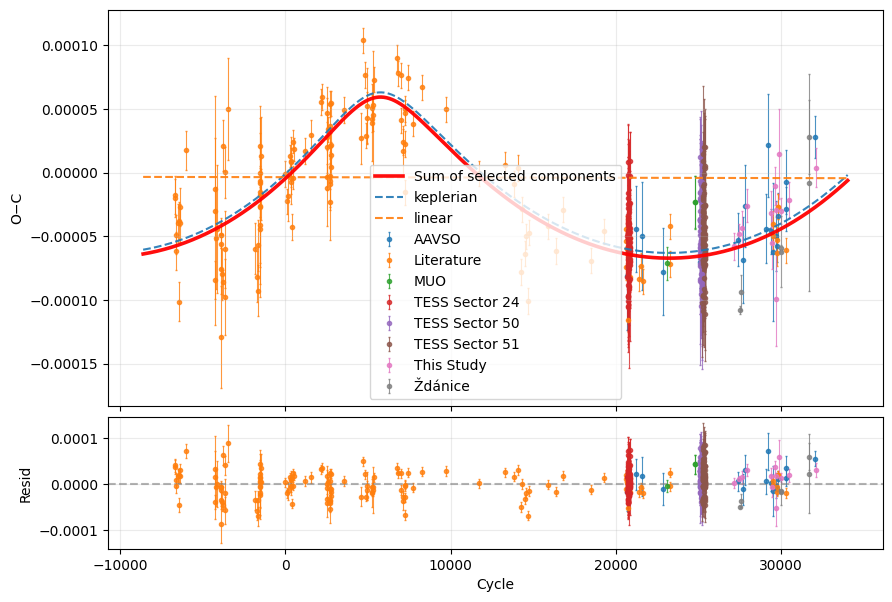

In [13]:
from ocpy.data import Data
from ocpy.oc import Keplerian, Linear, Parameter

# Dosya yolu
file_path = "dd_crb.csv"

# 'dd_crb.csv' dosyasına özel sütun eşleştirmeleri
column_mapping = {
    "Mintimes": "minimum_time",      # Zamanlar
    "Errors": "minimum_time_error",  # Hatalar
    "Mintypes": "minimum_type",      # Minima türü (0, 1 vb.)
    "Data_group": "labels"           # Gözlem grupları/Kaynaklar
}

# 1. Data nesnesini oluştur
data = Data.from_file(file_path, columns=column_mapping)

# Ağırlıkları hata paylarına göre hesapla (dosyada 'Errors' olduğu için yapılabilir)
if data.data["minimum_time_error"].notna().all():
    data = data.calculate_weights()

# 2. OCPyMC nesnesini oluştur
# Bu dosyadaki verilere uygun yaklaşık T0 ve Periyot değerleri:
t0 = 2455611.92657 
period = 0.161770446 

oc = data.calculate_oc(
    reference_minimum=t0,
    reference_period=period,
    model_type="lmfit"
)

# LiTE (Keplerian) tablodan
kep = Keplerian(
    amp=Parameter(
        value=6.308676e-05,
        std=4e-5,
        min=0.0,
        max=1e-4,
        fixed=False,
    ),
    e=Parameter(
        value=4.899339e-01,
        std=3e-1,
        min=0.0,
        max=0.95,
        fixed=False,
    ),
    omega=Parameter(
        value=8.501659e+01,   # 85.01659 deg
        std=180,
        min=0.0,
        max=360.0,
        fixed=False,
    ),
    P=Parameter(
        value=3.408862e+04,
        std=10000,
        min=20000,
        fixed=False,
    ),
    T0=Parameter(
        value=3.962810e+04,
        std=30000,
        fixed=False,
    ),
)

# Linear tablodan (dP, dT)
lin = Linear(
    a=Parameter(
        value=-2.330288e-11,
        std=1e-9,
        min=-1e-9,
        fixed=False,
    ),
    b=Parameter(
        value=-3.563066e-06,
        std=1e-4,
        min=-1e-4,
        fixed=False,
    ),
)

oc.plot([kep, lin])


In [14]:
from ocpy.oc import Linear, Quadratic, Keplerian, KeplerianOld, Parameter

res = oc.fit([kep,lin])

(<Axes: ylabel='O−C'>, <Axes: xlabel='Cycle', ylabel='Resid'>)

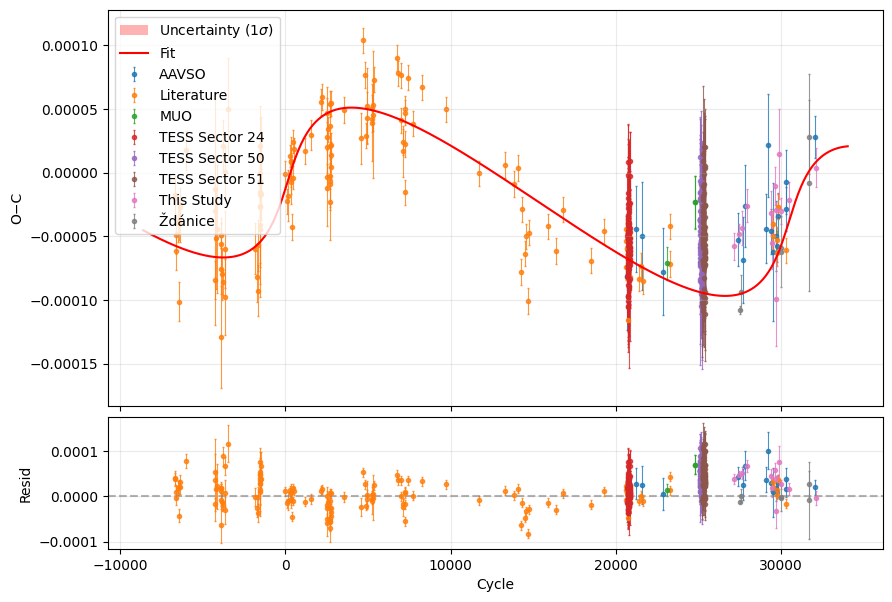

In [15]:
oc.plot(res)

In [16]:
res